## **Lab I - Dimensionality Reduction**

**Presented by:** Laura Isabel Barrera Echeverri

**1. Simulate any random rectangular matrix A**

In [1]:
## Generate Matrix with random rows and columns ##
class RandomMatrix:
    def __init__(self, m, n):
        self.m = m
        self.n = n
        self.A = np.random.rand(m, n)

 - ¿What is the rank and trace of A?

In [2]:
def rank(self):
    return np.linalg.matrix_rank(self.A)

def trace(self):
    return np.trace(self.A)

- ¿What is the determinant of A?

In [3]:
def determinant(self):
    try:
        if self.m == self.n: # Verifies if the matrix is square
            return np.linalg.det(self.A)
        else:
            return "The matrix is not square, its determinant cannot be calculated." # Returns an error message if it's not square.
    except np.linalg.LinAlgError:
        print("The matrix is not calculable determinant.")
        return None

- ¿Can you invert A? How?

The matrix A is only invertible when its determinant is zero or is a square.

In [4]:
def inverse(self):
    try:
        return np.linalg.inv(self.A)
    except np.linalg.LinAlgError:
        print("The matrix is not invertible.")
        return None

- ¿How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

In [5]:
def eigenvalue_eigenvector(self):
    AtA = self.A.T @ self.A
    AAt = self.A @ self.A.T
    
    eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(AtA)
    eigenvalues_AAt, eigenvectors_AAt = np.linalg.eigh(AAt)
    
    return {
        "eigenvalues_AtA": eigenvalues_AtA,
        "eigenvectors_AtA": eigenvectors_AtA,
        "eigenvalues_AAt": eigenvalues_AAt,
        "eigenvectors_AAt": eigenvectors_AAt,
    }

The difference between the eigenvalues of AA' and A'A lies in the dimensions of the resulting matrices.

If A is a matrix of size mxn, then the matrix AA' is of size m, while the matrix A'A is of size n.

As with the eigenvectors,if A is a matrix of size mxn, then the matrix AA' is of size mxm, while the matrix A'A is of size nxn.

_________________________________________________________________________________________________________________________________

**2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates**

For this point, please check the next link in Google Colab: https://colab.research.google.com/drive/12HC7ocH0g_gh2svBp7Qw6J5jmxiPKKMC?usp=sharing

_________________________________________________________________________________________________________________________________

**3. Let’s create the unsupervised Python package**

Please refer to a folder called ***"unsupervised"***.

_________________________________________________________________________________________________________________________________

**4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?**

In [1]:
from unsupervised.dimensionality_reduction.svd import SVD
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def image_convert2(filename,folder1,Folder2):
        img=Image.open(os.path.join(folder1, filename))
        img = img.convert("L")
        img = img.resize((256, 256))
        # img.save(os.path.join(Folder2, filename))
        img.save(os.path.join(Folder2, filename), format='PNG')
        # img = mpimg.imread(os.path.join(Folder2, filename))
        img = mpimg.imread(os.path.join(Folder2, filename), format='png')
        return img

(256, 256)
(256, 25)
(256, 256)


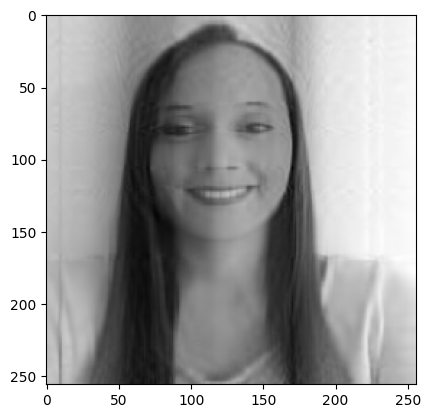

In [5]:
img = mpimg.imread(r'C:\Users\Lauara\Pictures\Laura.png')
current_path = os.getcwd()
img=image_convert2('Laura.png',f"{current_path}\My_image",f"{current_path}\My_image")
plt.imshow(img,cmap='gray')
print(img.shape)
svd = SVD(n_vectors=25)
new_image=svd.fit_transform(img)
print(new_image.shape)
plt.imshow(new_image,cmap='gray')
reverse=svd.inverse_transform()
print(reverse.shape)
plt.imshow(reverse,cmap='gray')

_________________________________________________________________________________________________________________________________

**5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?**

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]
y_train = y_train[masktrain]
X_test1 = X_test[masktest]
y_test1 = y_test[masktest]

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
#Resahpe the dataset
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])  
X_test1 = X_test1.reshape(X_test1.shape[0] , X_test1.shape[1]* X_test1.shape[2])  
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [9]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred1 = regressor.predict(X_test1)

c:\Users\Lauara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#Evaluate whit all numbers
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[ 973    0    0    0    0    0    0    0    7    0]
 [   3    0    0    0    0    0    0    0 1132    0]
 [ 474    0    0    0    0    0    0    0  558    0]
 [ 173    0    0    0    0    0    0    0  837    0]
 [ 118    0    0    0    0    0    0    0  864    0]
 [ 157    0    0    0    0    0    0    0  735    0]
 [ 558    0    0    0    0    0    0    0  400    0]
 [ 262    0    0    0    0    0    0    0  766    0]
 [  15    0    0    0    0    0    0    0  959    0]
 [  57    0    0    0    0    0    0    0  952    0]]
Accuracy:  0.1932


In [11]:
#Evaluate whit not numbers to 8
cm2 = confusion_matrix(y_test1, y_pred1)
print(cm2)
print('Accuracy: ', accuracy_score(y_test1, y_pred1))

[[973   7]
 [ 15 959]]
Accuracy:  0.9887410440122825


_________________________________________________________________________________________________________________________________

**6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.**
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

In [13]:
from unsupervised.dimensionality_reduction.pca import PCA
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

**Create a PCA object with 2 components:**

In [14]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]/255.0
y_train = y_train[masktrain]
X_test = X_test[masktest]/255.0
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [15]:
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data
pca.fit(X_train)
# transform the data using the PCA object
reduced_x_train = pca.transform(X_train)
print(reduced_x_train.shape)
reduced_x_train = np.real(reduced_x_train)

(11774, 2)


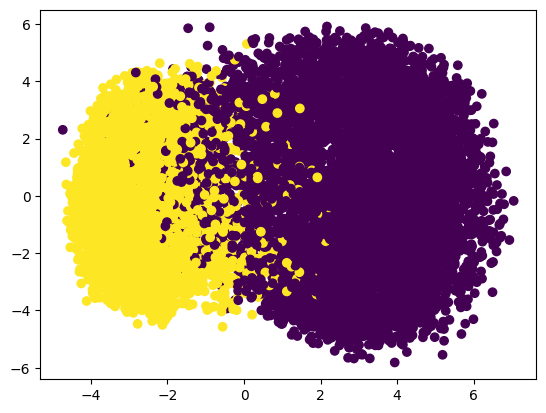

In [16]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [17]:
# pca.fit(X_test)
reduced_x_test = pca.transform(X_test)
print(reduced_x_test.shape)
reduced_x_test = np.real(reduced_x_test)

(1954, 2)


In [18]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

In [19]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[936  44]
 [ 50 924]]
Accuracy:  0.9518935516888434


The precision was affected by the loss of information when transforming the reduced data from PCA to real, because its output was complex numbers and the new data describes a precision that is acceptable.

**Create SVD object with 2 components:**

In [20]:
from unsupervised.dimensionality_reduction.svd import SVD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]
y_train = y_train[masktrain]
X_test = X_test[masktest]
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

svd=SVD(2)
reduced_x_train=svd.fit_transform(X_train)

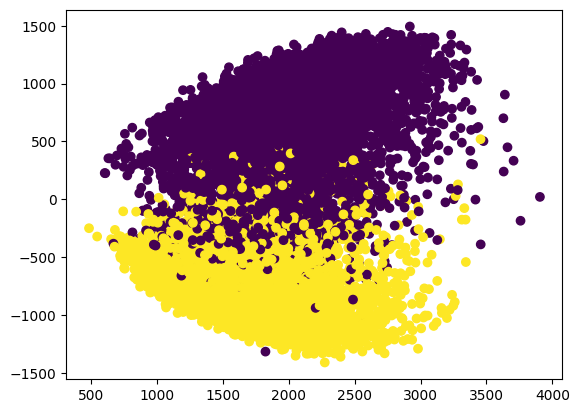

In [22]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [23]:
reduced_x_test=svd.fit_transform(X_test)

In [24]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

In [25]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[942  38]
 [ 40 934]]
Accuracy:  0.9600818833162743


The precision was affected by the loss of information and the new data describe a higher precision than the PCA method, which is acceptable.

_________________________________________________________________________________________________________________________________

**7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?**

**Create with PCA**:

In [26]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [27]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]/255.0
y_train = y_train[masktrain]
X_test = X_test[masktest]/255.0
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [28]:
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data
pca.fit(X_train)
# transform the data using the PCA object
reduced_x_train = pca.transform(X_train)
print(reduced_x_train.shape)

(11774, 2)


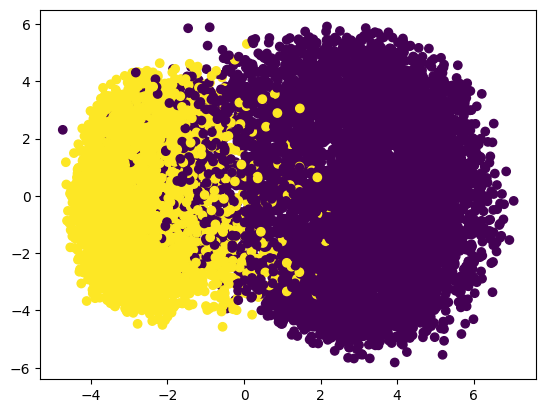

In [29]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [30]:
pca.fit(X_test)
reduced_x_test = pca.transform(X_test)
print(reduced_x_test.shape)

(1954, 2)


In [31]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_test, y_test)
y_pred = regressor.predict(reduced_x_test)

In [32]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[934  46]
 [ 38 936]]
Accuracy:  0.9570112589559877


The precision of this model is higher than the previous PCA method.

**Create with SVD**:

In [33]:
from sklearn.decomposition import TruncatedSVD

In [34]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]
y_train = y_train[masktrain]
X_test = X_test[masktest]
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [35]:
svd = TruncatedSVD(n_components=2, random_state=0)
reduced_x_train = svd.fit_transform(X_train)
reduced_x_test = svd.fit_transform(X_test)

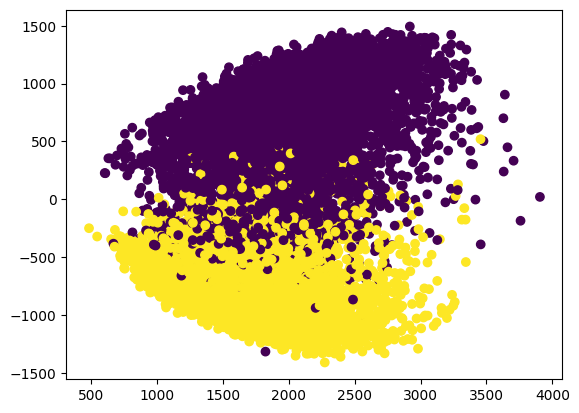

In [36]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [37]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

In [38]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[942  38]
 [ 40 934]]
Accuracy:  0.9600818833162743


_________________________________________________________________________________________________________________________________

**8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)**
[https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb]

To make the PCA method more robust, the following is suggested:
1. Preprocess the data to eliminate outliers and data contamination.

2. Truncated SVD or Random SVD: Truncated singular value decomposition is a variation of PCA that reduces the number of singular values and singular vectors used to approximate the original matrix. This method is less sensitive to outliers and can provide a more stable solution.

2. Using a randomized SVD is a technique that uses random matrices to approximate the singular value decomposition of a matrix and to remove background and noise and make eigenvalues and eigenvectors accurate by minimizing them.

_________________________________________________________________________________________________________________________________

**9. What are the underlying mathematical principles behind UMAP? What is it useful for?**

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that uses a combination of mathematical principles from nerve theorem, graph theory, Riemannian geometry, and topological data analysis to construct a low-dimensional representation of high-dimensional data.

- The nerve theorem is used to construct a simplicial complex that captures the topological structure of the data. UMAP constructs a weighted k-nearest neighbor graph, where each data point is connected to its k nearest neighbors, and uses the weights on these edges to represent the degree of similarity between the connected points.

- Riemannian geometry is used to measure the distance between points in the low-dimensional space by minimizing a cost function based on a Riemannian metriz, which measures the curvature of a space.

- Topological Data Analysis (TDA) is a branch of mathematics that uses algebraic topological structure of data. In the context of UMAP, TDA is used to construct a simplicial complex using the Mapper algorithm, which constructs a simplicial complex based on a cover of overlapping sets.

_________________________________________________________________________________________________________________________________

**10. What are the underlying mathematical principles behind LDA? What is it useful for?**

LDA (Latent Dirichlet Allocation) is a probabilistic model used in machine learning and natural language processing to analyze large sets of text data and discover latent or hidden topics. The mathematical principles underlying LDA are based on probability theory and topic modeling.

- The LDA model is based on the assumption that each document is composed of a mixture of several topics and that each word in the document is generated from one of these topics. The model uses statistical inference techniques to find the most likely topic distribution for each document and the most likely word distribution for each topic.

- Uses an unsupervised learning approach, which means it does not require labels or prior information about the data. Instead, the model automatically infers the underlying structure of the data.

- Is useful in a variety of applications, such as automatic document classification, news clustering, and identifying emerging topics on social media.

_________________________________________________________________________________________________________________________________

**11. Use your unsupervised Python package as a basis to build an HTTP server that receives a record as input and returns the class of the image. Suggestions: MNIST digit classifier, Iris classifier…**